In [1]:
# Importing and basic utility cell
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}
%matplotlib inline
!pip install datascience 
from datascience import * 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
# Read in Data
raw_Education = pd.read_excel('Education.xls',header = 4)
raw_PopulationEstimates = pd.read_excel('PopulationEstimates.xls',header = 2)
raw_PovertyEstimates = pd.read_excel('PovertyEstimates.xls',header = 3)
raw_Unemployment = pd.read_excel('Unemployment.xls',header = 9)
raw_financial_aid = pd.read_excel('FinancialAidByLocation.xls',header = 4)

#Filtering Data
filtered_education = raw_Education[raw_Education['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1).drop(335)
filtered_population_estimates = raw_PopulationEstimates[raw_PopulationEstimates['Area_Name'].isin(states.values())]\
                                .dropna(axis = 1).drop(328)
filtered_poverty_estimate = raw_PovertyEstimates[raw_PovertyEstimates['Area_Name'].isin(states.values())]\
                            .dropna(axis = 1).drop(328)
filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())]\
                                .dropna(axis = 1).drop(330)
    
filtered_financial_aid = raw_financial_aid[['Location','Disbursements                                        (in millions).1',\
                   'Recipients                                              (in thousands).1']].\
                    rename(columns = \
                           {'Disbursements                                        (in millions).1':'Disbursements',\
                            'Recipients                                              (in thousands).1':'Recepient'})\
                    [raw_financial_aid['Location'].isin(states.values())]
        
# putting into the Datascience Table format
education_raw = Table.from_df(filtered_education)
population_estimate_raw = Table.from_df(filtered_population_estimates)
poverty_estimates_raw = Table.from_df(filtered_poverty_estimate)
unemployment_raw = Table.from_df(filtered_unemployment)
financial_aid_raw = Table.from_df(filtered_financial_aid)

# Overall Dataset
overall = education_raw.join('Area_Name',population_estimate_raw,'Area_Name').\
        join('Area_Name',poverty_estimates_raw,'Area_Name').\
        join('Area_Name',unemployment_raw.\
             drop(['Rural-urban_Continuum_Code_2003',
                   'Urban_Influence_Code_2003',
                   'Rural-urban_Continuum_Code_2013',
                   'Urban_Influence_Code_2013']),
             'Area_name').\
        join('Area_Name',financial_aid_raw,'Location')
        


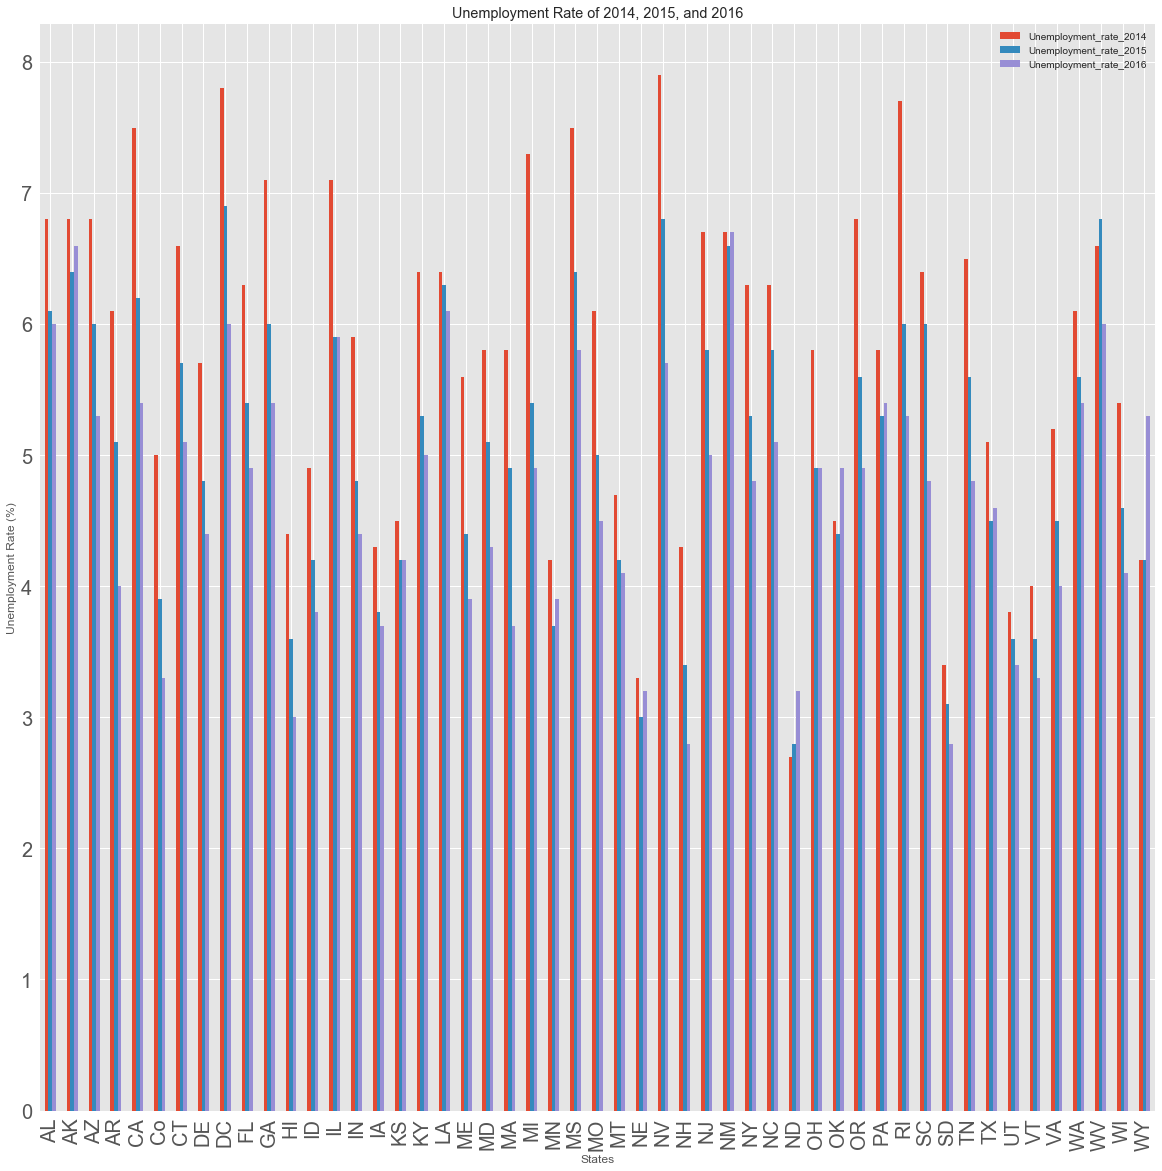

In [3]:
# Plotting unemployment rate for year 2014, 2015, 2016
#filtered_unemployment = raw_Unemployment[raw_Unemployment['Area_name'].isin(states.values())].drop(['Rural_urban_continuum_code_2013','Urban_influence_code_2013','Metro_2013'],axis = 1)
unemployment_rate_2014_2015_2016 = filtered_unemployment[['State',
                                                      'Unemployment_rate_2014',
                                                      'Unemployment_rate_2015',
                                                      'Unemployment_rate_2016']]
unemployment_rate_2014_2015_2016_plot = unemployment_rate_2014_2015_2016.plot.bar(figsize = (20,20),
                                               x = unemployment_rate_2014_2015_2016['State'],
                                               title = 'Unemployment Rate of 2014, 2015, and 2016',
                                               fontsize = 20)

unemployment_rate_2014_2015_2016_plot.set_ylabel('Unemployment Rate (%)')
unemployment_rate_2014_2015_2016_plot.set_xlabel('States')


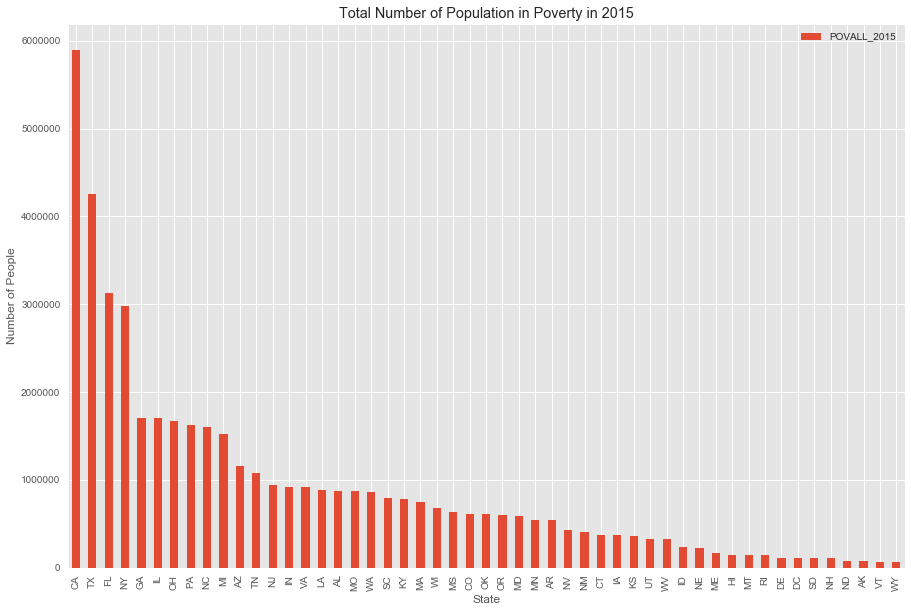

In [4]:
cleaned_sort_by_states = filtered_poverty_estimate.drop(filtered_poverty_estimate.columns[[0,3,4,5,6,]],axis = 1)
selected = cleaned_sort_by_states[['State','POVALL_2015','CI90LBAll_2015','CI90UBALL_2015']].sort_values(by = "POVALL_2015",ascending = False)
pov_in_2015 = selected[['State','POVALL_2015']].plot(x = "State", kind = 'bar',figsize=(15,10),title = 'Total Number of Population in Poverty in 2015')
pov_in_2015.set_ylabel('Number of People')

#education_raw 
#population_estimate_raw 
#poverty_estimates_raw 
#unemployment_raw 
#financial_aid_raw 

In [5]:
t = Table().with_columns('State',overall.column('Area_Name'),
                     'Percent Adult having less than high school degree', 
                         overall.column('Percent of adults with less than a high school diploma, 2011-2015'),   
                     'Percent in Poverty',overall.column('PCTPOVALL_2015'),
                     'Percent Unemployment',overall.column('Unemployment_rate_2015'),
                     'Average Grant Per Person (In thousands)',
                         ((1e6*overall.column('Disbursements')) / (overall.column('Recepient') * 1e3)) / 1000
                        )

In [6]:
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

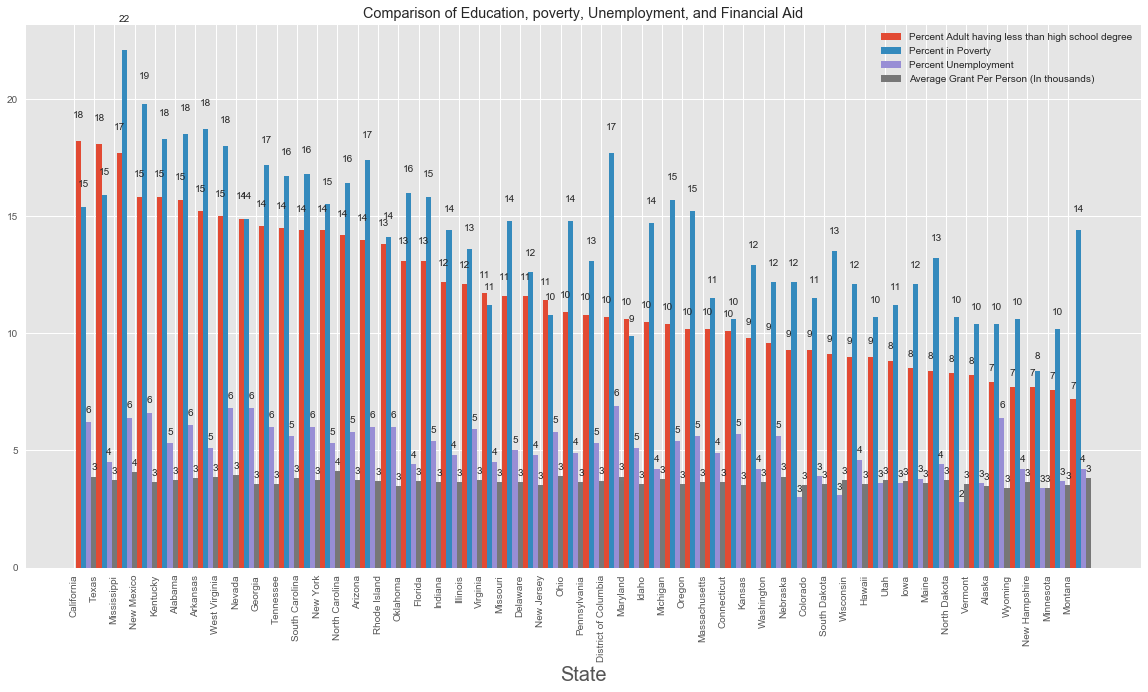

In [7]:
t = t.sort('Percent Adult having less than high school degree',descending = True)
width = 0.25
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(1,1,1)
bar_list = []
for col_index in range(t.num_columns):
    if col_index != 0:
        current_bar = ax.bar(np.arange(t.num_rows) + width * col_index, 
                           t.column(col_index),
                           width,
                           label = t.labels[col_index])   
        bar_list.append(current_bar)

for index in range(len(bar_list)):
    autolabel(bar_list[index])
    

#ax.set_ylabel('Percent',fontsize = 20)
ax.set_xlabel('State',fontsize = 20)
ax.legend()
plt.xticks(np.arange(50),t.column(0),rotation = 90)
plt.title('Comparison of Education, poverty, Unemployment, and Financial Aid')
plt.show()

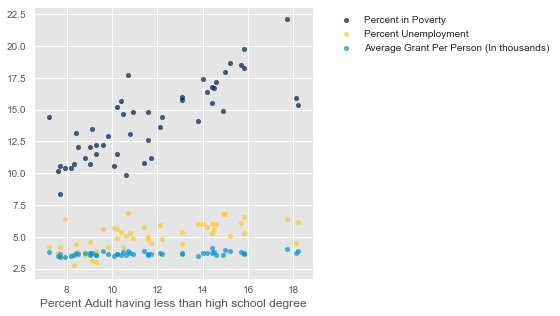

In [23]:
t.drop(0).scatter(0)

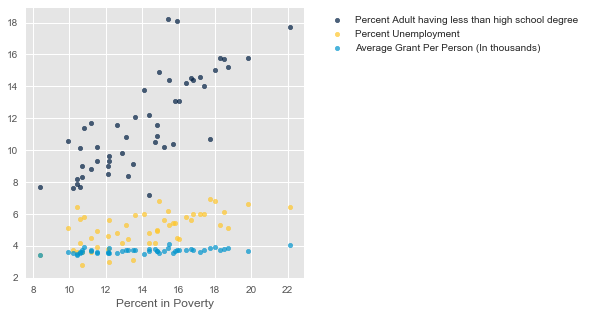

In [24]:
t.drop(0).scatter(1)

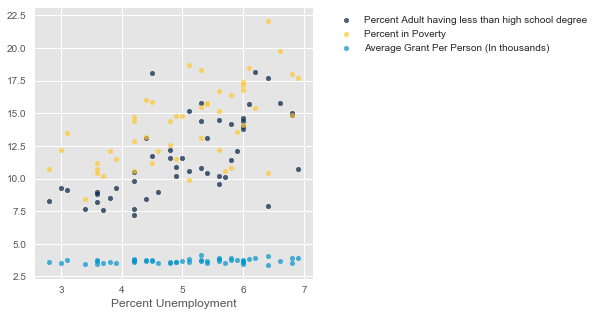

In [25]:
t.drop(0).scatter(2)

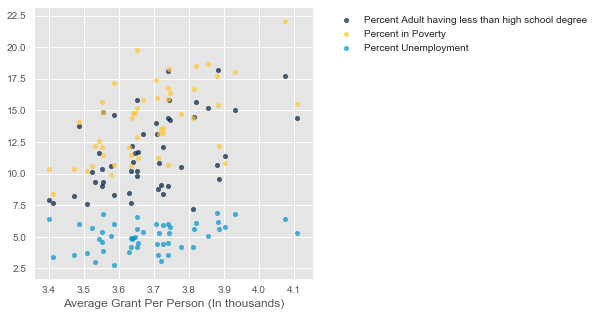

In [26]:
t.drop(0).scatter(3)

In [8]:
print('The average of the financial aid per person across all states is',np.mean(t.column(4)))

The average of the financial aid per person across all states is 3.68826639479


In [9]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

In [10]:
greater_than_avg = (t.column(4) > np.mean(t.column(4)))
lin_reg_data = t.with_column('per_person_FA_greater_than_avg',greater_than_avg)
print('Correlation between Percent Adult having less than high school degree and per_person_FA_greater_than_avg:\n -->',
      correlation(lin_reg_data,'Percent Adult having less than high school degree','per_person_FA_greater_than_avg'),'\n')

print('Correlation between Percent in Poverty and per_person_FA_greater_than_avg:\n -->',
      correlation(lin_reg_data,'Percent in Poverty','per_person_FA_greater_than_avg') ,'\n')

print('Correlation between Percent Unemployment and per_person_FA_greater_than_avg:\n -->',
      correlation(lin_reg_data,'Percent Unemployment','per_person_FA_greater_than_avg'),'\n')

Correlation between Percent Adult having less than high school degree and per_person_FA_greater_than_avg:
 --> 0.377207925768 

Correlation between Percent in Poverty and per_person_FA_greater_than_avg:
 --> 0.436115540779 

Correlation between Percent Unemployment and per_person_FA_greater_than_avg:
 --> 0.207603844745 



/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


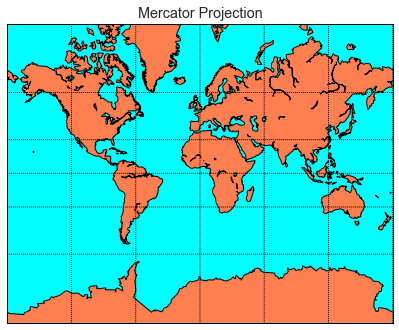

In [11]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
# Draw the coastlines
m.drawcoastlines()
# Color the continents
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
# fill in the oceans
m.drawmapboundary(fill_color='aqua')
plt.title("Mercator Projection")
plt.show()

/Applications/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


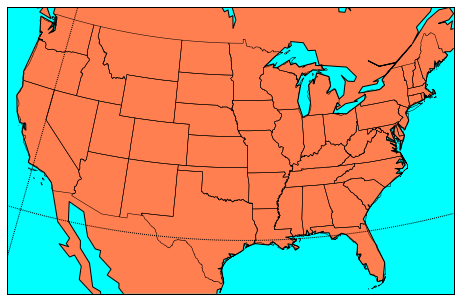

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)
m.drawcoastlines()
# Color the continents
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
# fill in the oceans
m.drawmapboundary(fill_color='aqua')
plt.show()




In [13]:
"""
# population density by state from
# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density
popdensity = {
'New Jersey':  438.00,
'Rhode Island':   387.35,
'Massachusetts':   312.68,
'Connecticut':    271.40,
'Maryland':   209.23,
'New York':    155.18,
'Delaware':    154.87,
'Florida':     114.43,
'Ohio':  107.05,
'Pennsylvania':  105.80,
'Illinois':    86.27,
'California':  83.85,
'Hawaii':  72.83,
'Virginia':    69.03,
'Michigan':    67.55,
'Indiana':    65.46,
'North Carolina':  63.80,
'Georgia':     54.59,
'Tennessee':   53.29,
'New Hampshire':   53.20,
'South Carolina':  51.45,
'Louisiana':   39.61,
'Kentucky':   39.28,
'Wisconsin':  38.13,
'Washington':  34.20,
'Alabama':     33.84,
'Missouri':    31.36,
'Texas':   30.75,
'West Virginia':   29.00,
'Vermont':     25.41,
'Minnesota':  23.86,
'Mississippi':   23.42,
'Iowa':  20.22,
'Arkansas':    19.82,
'Oklahoma':    19.40,
'Arizona':     17.43,
'Colorado':    16.01,
'Maine':  15.95,
'Oregon':  13.76,
'Kansas':  12.69,
'Utah':  10.50,
'Nebraska':    8.60,
'Nevada':  7.03,
'Idaho':   6.04,
'New Mexico':  5.79,
'South Dakota':  3.84,
'North Dakota':  3.59,
'Montana':     2.39,
'Wyoming':      1.96,
'Alaska':     0.42}
# choose a color for each state based on population density.
colors={}
statenames=[]
cmap = plt.cm.hot # use 'hot' colormap
vmin = 0; vmax = 450 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = popdensity[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more.
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one.
ax = plt.gca() # get current axes instance
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Filling State Polygons by Population Density')
"""

"\n# population density by state from\n# http://en.wikipedia.org/wiki/List_of_U.S._states_by_population_density\npopdensity = {\n'New Jersey':  438.00,\n'Rhode Island':   387.35,\n'Massachusetts':   312.68,\n'Connecticut':    271.40,\n'Maryland':   209.23,\n'New York':    155.18,\n'Delaware':    154.87,\n'Florida':     114.43,\n'Ohio':  107.05,\n'Pennsylvania':  105.80,\n'Illinois':    86.27,\n'California':  83.85,\n'Hawaii':  72.83,\n'Virginia':    69.03,\n'Michigan':    67.55,\n'Indiana':    65.46,\n'North Carolina':  63.80,\n'Georgia':     54.59,\n'Tennessee':   53.29,\n'New Hampshire':   53.20,\n'South Carolina':  51.45,\n'Louisiana':   39.61,\n'Kentucky':   39.28,\n'Wisconsin':  38.13,\n'Washington':  34.20,\n'Alabama':     33.84,\n'Missouri':    31.36,\n'Texas':   30.75,\n'West Virginia':   29.00,\n'Vermont':     25.41,\n'Minnesota':  23.86,\n'Mississippi':   23.42,\n'Iowa':  20.22,\n'Arkansas':    19.82,\n'Oklahoma':    19.40,\n'Arizona':     17.43,\n'Colorado':    16.01,\n'Main